In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


In [155]:
data = pd.read_csv('traffic_weather.csv')   
data.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature
0,Azie MortonBarton Springs,7,9,2019,1,2,0,NB,28.0,9.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,24.717245
1,Azie MortonBarton Springs,7,9,2019,1,2,0,SB,24.0,8.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,24.717245
2,Azie MortonBarton Springs,7,9,2019,0,2,0,NB,28.0,25.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,25.686649
3,Azie MortonBarton Springs,7,9,2019,0,2,0,SB,28.0,36.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,25.686649
4,Azie MortonBarton Springs,7,8,2019,23,1,0,NB,27.0,26.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,25.675000


In [156]:
# date to date time
data['Full Date'] = pd.to_datetime(data['Full Date'])

# sort by intersection direction full date
data = data.sort_values(by=['Intersection Name', 'Direction', 'Full Date'])

# group by and apply the lag
data['Lag_Traffic'] = data.groupby(['Intersection Name', 'Direction'])['Volume'].shift(8)

data.head()


,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature,Lag_Traffic
27876,Azie MortonBarton Springs,8,18,2017,12,5,0,NB,19.0,424.0,2017-08-18 12:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,36.440128,NaN
27874,Azie MortonBarton Springs,8,18,2017,13,5,0,NB,17.0,492.0,2017-08-18 13:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,37.449261,NaN
27872,Azie MortonBarton Springs,8,18,2017,14,5,0,NB,20.0,397.0,2017-08-18 14:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.083629,NaN
27870,Azie MortonBarton Springs,8,18,2017,15,5,0,NB,21.0,364.0,2017-08-18 15:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.300000,NaN
27868,Azie MortonBarton Springs,8,18,2017,16,5,0,NB,20.0,328.0,2017-08-18 16:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.083629,NaN


In [157]:
# count na values
data.isna().sum()

Intersection Name      0
Month                  0
Day                    0
Year                   0
Hour                   0
Day of Week            0
Holiday                0
Direction              0
Speed                  0
Volume                 0
Full Date              0
date                   0
tavg                   0
tmin                   0
tmax                   0
prcp                   0
snow                   0
wspd                   0
temperature            0
Lag_Traffic          224
dtype: int64

In [158]:
# drop na values
data = data.dropna()
data.isna().sum()

Intersection Name    0
Month                0
Day                  0
Year                 0
Hour                 0
Day of Week          0
Holiday              0
Direction            0
Speed                0
Volume               0
Full Date            0
date                 0
tavg                 0
tmin                 0
tmax                 0
prcp                 0
snow                 0
wspd                 0
temperature          0
Lag_Traffic          0
dtype: int64

In [159]:
# drop the Full Date, tavg, tmin, and tmax columns
data = data.drop(['Full Date', 'date', 'tavg', 'tmin', 'tmax'], axis=1)
data.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,Azie MortonBarton Springs,8,18,2017,20,5,0,NB,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,Azie MortonBarton Springs,8,18,2017,21,5,0,NB,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,Azie MortonBarton Springs,8,18,2017,22,5,0,NB,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,Azie MortonBarton Springs,8,18,2017,23,5,0,NB,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,Azie MortonBarton Springs,8,19,2017,0,6,0,NB,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [160]:
# encoded categorical variables
label_encoder = LabelEncoder()
data_encoded = data
data_encoded['Intersection Name'] = label_encoder.fit_transform(data['Intersection Name'])
data_encoded['Direction'] = label_encoder.fit_transform(data['Direction'])
data_encoded['Month'] = label_encoder.fit_transform(data['Month'])
data_encoded['Day'] = label_encoder.fit_transform(data['Day'])
data_encoded['Year'] = label_encoder.fit_transform(data['Year'])
data_encoded['Hour'] = label_encoder.fit_transform(data['Hour'])
data_encoded['Day of Week'] = label_encoder.fit_transform(data['Day of Week'])

In [197]:
data_encoded.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,0,7,17,0,20,5,0,0,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,0,7,17,0,21,5,0,0,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,0,7,17,0,22,5,0,0,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,0,7,17,0,23,5,0,0,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,0,7,18,0,0,6,0,0,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [162]:
X = data_encoded.drop('Volume', axis=1)
y = data_encoded['Volume']

In [163]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
# create model with params
rf_regressor = RandomForestRegressor(
    n_estimators=100,        # num trees in forest
    bootstrap=True,         
    random_state=42          
)

In [166]:
# 5fold cv on training data
# cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Convert negative MSE to RMSE
# cv_rmse = np.sqrt(-cv_scores)

# print(f"Cross-Validation RMSE scores: {cv_rmse}")
# print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse)}")

In [167]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [168]:
y_pred = rf_regressor.predict(X_test)

In [169]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RF Mean Squared Error: {mse}")
print(f"RF Root Mean Squared Error: {rmse}")
print(f"RF R-squared: {r2}")

RF Mean Squared Error: 9878.09718376784
RF Root Mean Squared Error: 99.38861697280952
RF R-squared: 0.9585344377284798


In [170]:
#predict on training
y_train_pred = rf_regressor.predict(X_train)

#get training metrics to compare / see if overfitting
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R^2: {train_r2}")

Training RMSE: 37.47617652919455
Training R^2: 0.9940647804782158


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


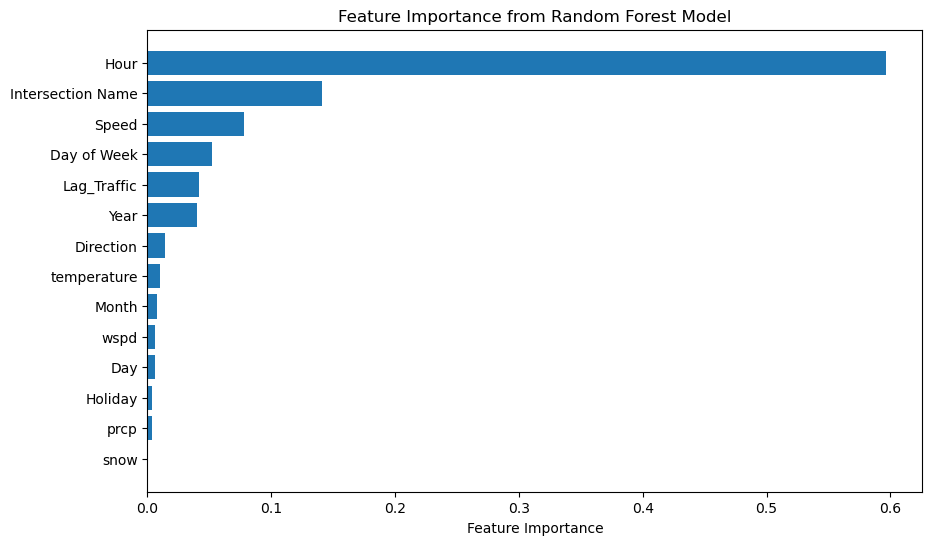

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# get feature importance and feature names
feature_importance = rf_regressor.feature_importances_
feature_names = X.columns

# sort feature importance values desc
sorted_idx = np.argsort(feature_importance)[::-1]  
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [174]:
data.dtypes

Intersection Name      int64
Month                  int64
Day                    int64
Year                   int64
Hour                   int64
Day of Week            int64
Holiday                int64
Direction              int64
Speed                float64
Volume               float64
prcp                 float64
snow                   int64
wspd                 float64
temperature          float64
Lag_Traffic          float64
dtype: object

## Linear Trees

In [198]:
from lineartree import LinearTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from lineartree import LinearForestRegressor


In [199]:
# encode categorical variables
label_encoder = LabelEncoder()
data_encoded['Intersection Name'] = label_encoder.fit_transform(data['Intersection Name'])
data_encoded['Direction'] = label_encoder.fit_transform(data['Direction'])
data_encoded['Month'] = label_encoder.fit_transform(data['Month'])
data_encoded['Day'] = label_encoder.fit_transform(data['Day'])
data_encoded['Year'] = label_encoder.fit_transform(data['Year'])
data_encoded['Hour'] = label_encoder.fit_transform(data['Hour'])
data_encoded['Day of Week'] = label_encoder.fit_transform(data['Day of Week'])

In [200]:
data_encoded.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,0,7,17,0,20,5,0,0,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,0,7,17,0,21,5,0,0,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,0,7,17,0,22,5,0,0,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,0,7,17,0,23,5,0,0,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,0,7,18,0,0,6,0,0,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [201]:
# prep data
X = data_encoded.drop(columns=['Volume']) #everything but volume
y = data_encoded['Volume'] 


In [202]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# scale numeric
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scale target
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


In [204]:
data_encoded.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
27860,0,7,17,0,20,5,0,0,22.0,296.0,0.0,0,7.9,33.593501,424.0
27858,0,7,17,0,21,5,0,0,24.0,200.0,0.0,0,7.9,31.950000,492.0
27856,0,7,17,0,22,5,0,0,26.0,141.0,0.0,0,7.9,30.306499,397.0
27854,0,7,17,0,23,5,0,0,27.0,94.0,0.0,0,7.9,28.775000,364.0
27852,0,7,18,0,0,6,0,0,28.0,69.0,0.0,0,6.8,26.435608,328.0


In [209]:
# split features: categorical features 
categorical_features = ['Holiday', 'Direction', 'Intersection Name', 'Month', 'Day', 'Year']

split_features = ['Day of Week', 'Hour', 'temperature']

# linear features: cont features for linear modeling
linear_features = ['Speed', 'prcp', 'snow', 'wspd', 'Hour', 'Day of Week', 'temperature', 'Lag_Traffic']

In [210]:
# feature names to indices 
categorical_features_indices = [X.columns.get_loc(feature) for feature in categorical_features]
split_feature_indices = [X.columns.get_loc(feature) for feature in split_features]
linear_feature_indices = [X.columns.get_loc(feature) for feature in linear_features]

In [211]:

# base estimator is LinearRegression
linear_tree = LinearTreeRegressor(
    base_estimator=LinearRegression(),
    criterion="rmse",              # RMSE for split quality
    max_depth= 20,                   # limit tree depth to prevent overfitting
    min_samples_split=10,          # min samples to allow a split
    min_samples_leaf=200,            # max samples in a leaf
    split_features=split_feature_indices,  # features to split on
    linear_features=linear_feature_indices, # features to regress
    categorical_features=categorical_features_indices
)

In [212]:
# train the model
linear_tree.fit(X_train, y_train)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    categorical_features=[6, 7, 0, 1, 2, 3], criterion='rmse',
                    linear_features=[8, 9, 10, 11, 4, 5, 12, 13], max_depth=20,
                    min_samples_leaf=200, min_samples_split=10,
                    split_features=[5, 4, 12])

In [213]:
# predict on test
y_pred = linear_tree.predict(X_test)
y_pred_linear_tree = linear_tree.predict(X_test)

In [214]:
# calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R^2: {r2}")

Test RMSE: 260.8103327894535
Test R^2: 0.7144620410730279


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


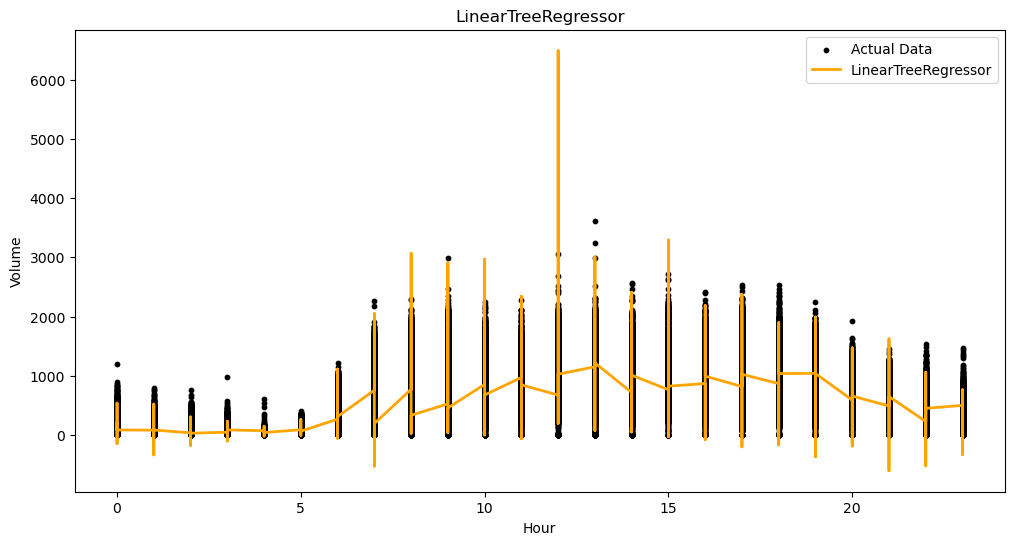

In [215]:
# visualize results
plot_feature = X_test['Hour'].values 
actual_values = y_test.values

# sort values
sorted_indices = np.argsort(plot_feature)
plot_feature_sorted = plot_feature[sorted_indices]
actual_values_sorted = actual_values[sorted_indices]
y_pred_linear_tree_sorted = y_pred_linear_tree[sorted_indices]


plt.figure(figsize=(12, 6))
plt.scatter(plot_feature_sorted, actual_values_sorted, color='black', s=10, label='Actual Data')
plt.plot(plot_feature_sorted, y_pred_linear_tree_sorted, color='orange', linewidth=2, label='LinearTreeRegressor')
plt.xlabel("Hour")
plt.ylabel("Volume")
plt.title("LinearTreeRegressor")
plt.legend()
plt.show()

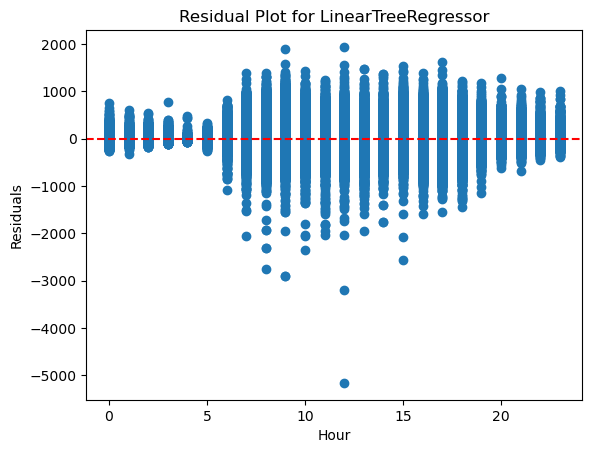

In [216]:
residuals = y_test - y_pred_linear_tree
plt.scatter(X_test['Hour'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Hour')
plt.ylabel('Residuals')
plt.title('Residual Plot for LinearTreeRegressor')
plt.show()


In [224]:
linear_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.19049607,
       0.26704255, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.54246138, 0.        ])

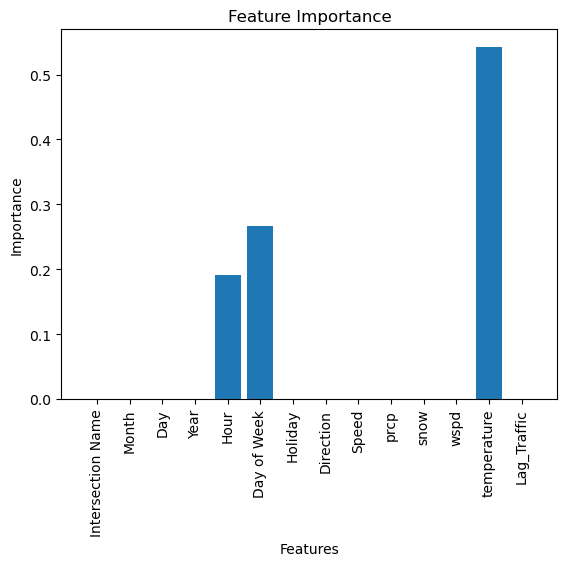

In [226]:
# plot feature importance
feature_importance = linear_tree.feature_importances_
feature_names = X_test.columns

plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## Linear Forest

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge
from lineartree import LinearForestRegressor
import numpy as np

In [218]:
# initialize model - LinearForestRegressor
linear_forest = LinearForestRegressor(
    base_estimator=Ridge(alpha=10.0),  # ridge as base
    n_estimators=300,                 # num trees
    max_features = None,
    max_depth=20,                    
    min_samples_split=20,          
    min_samples_leaf=20,      
    bootstrap=True,         
    n_jobs=-1                
)

In [219]:
# Fit the model
linear_forest.fit(X_train, y_train)

LinearForestRegressor(base_estimator=Ridge(alpha=10.0), max_depth=20,
                      max_features=None, min_samples_leaf=20,
                      min_samples_split=20, n_estimators=300, n_jobs=-1)

In [220]:
# predict on test data
y_pred_forest = linear_forest.predict(X_test)

rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"LinearForestRegressor RMSE: {rmse_forest}")
print(f"LinearForestRegressor R^2: {r2_forest}")


LinearForestRegressor RMSE: 123.51473799315391
LinearForestRegressor R^2: 0.935959925699286


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


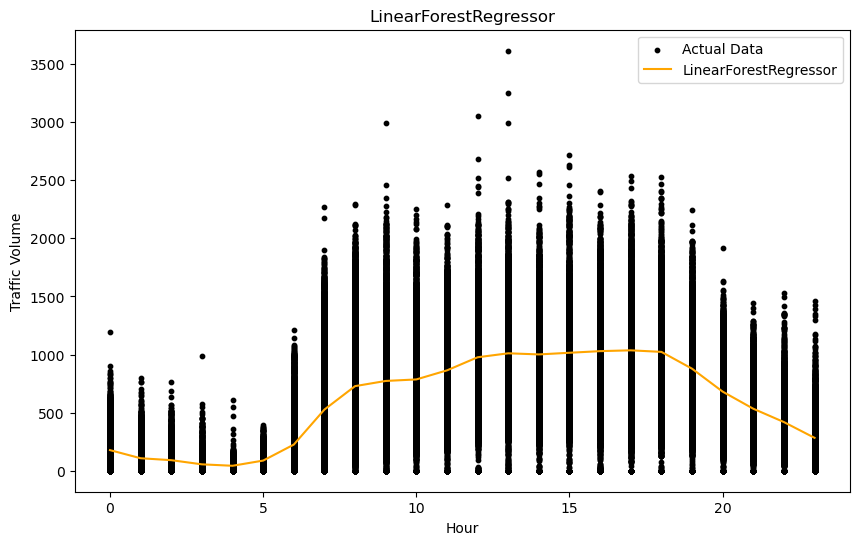

In [221]:
# get hour 
hour_feature = X_test['Hour'].values

# create df for plotting
plot_df_forest = pd.DataFrame({
    'Hour': hour_feature,
    'Actual': y_test.values,        
    'Predicted': y_pred_forest
})

# group by hour for better visualization
plot_df_grouped = plot_df_forest.groupby('Hour').mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(plot_df_forest['Hour'], plot_df_forest['Actual'], c='black', s=10, label='Actual Data')
plt.plot(plot_df_grouped['Hour'], plot_df_grouped['Predicted'], color='orange', label='LinearForestRegressor')
plt.title('LinearForestRegressor')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


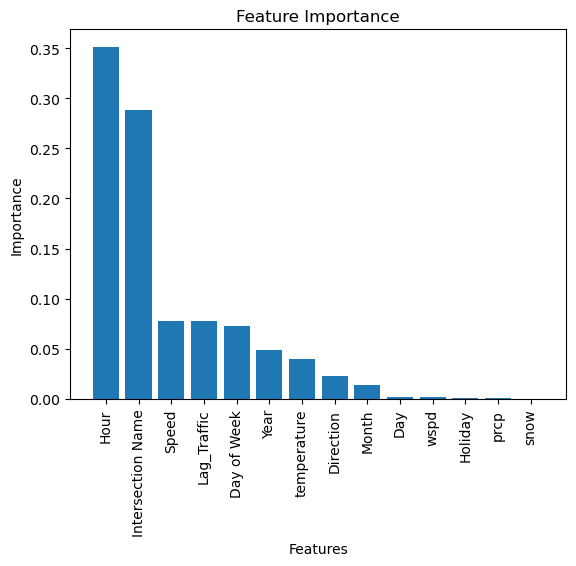

In [228]:
# plot feature importance in order
feature_importance = linear_forest.feature_importances_
feature_names = X_test.columns

# sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
feature_names = feature_names[sorted_idx]
feature_importance = feature_importance[sorted_idx]

plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()